In [10]:
# import modules
%matplotlib inline
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import requests

url = "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_"
response = requests.get(url)
if response.status_code == 200:
    with open("TaipeiSansTCBeta-Regular.ttf", "wb") as file:
        file.write(response.content)
else:
    print("Download failed. Status code:", response.status_code)
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

# 讀取 CSV 檔案，假設檔案名稱為 your_data.csv
# 輕軌："沙崙海水浴場", "情人橋", "淡水漁人碼頭觀景平台", "櫻花道", "滬尾礮臺", "淡水美麗新影城", "綠野馬術文化園區", "家樂福淡新店", "淡江大學","淡水漁人碼頭長堤","滬尾砲台公園"
# 捷運："淡水金色水岸", "淡水老街廣場", "淡水碼頭", "淡水海關碼頭", "淡水紅毛城", "小白宮","淡水捷運公園","淡水福佑宮","馬偕上岸處"
file_path = "/Users/chriskeng/Documents/112課程/資科導/期末專案/text_comment/輕軌/滬尾砲台公園.csv"
#file_path = "/Users/chriskeng/Documents/112課程/資科導/期末專案/text_comment/捷運/馬偕上岸處.csv"
raw_df = pd.read_csv(file_path)

# 刪除包含 "no_text" 的行
df_filtered = raw_df[raw_df.iloc[:, 0] != "no_text"]

# 取得第一個 column 的所有文字
text_data = " ".join(df_filtered.iloc[:, 0].astype(str))

print(text_data)

適合散步，思考未來的好地方 淡水滬尾砲台的夏夜一隅 整個公園有著完整設計的健身器材，是全家大小休閒好去處 草地大平坦散散步很好，有運動器材，涼亭，很好的公設。 這裡原本是淡水球場的第六、七號球道，後來台北縣政府向球場收回縣有地，闢建為滬尾砲台公園，占地計八公頃。由於前身為高爾夫球場，因此公園內擁有大片草坪，視野開闊，綠意盎然，成為休閒的 … 很安靜且舒服，適合散步、運動、拍照、遛狗的好地方 砲台公園有健身設施可以免費使用，很加分。 第一次來這個地方原來這裡是拍婚紗的地方超級多人 去雲門可以順便逛逛 很棒的公園👍看得出來有在維護但可惜了… … 解說員很熱情！ 有很多健身器材，人少 有樹蔭的野餐好所在啊！ 適合天氣晴朗時散步的好地方 好玩，好逛的地方 散步好地方 無法停車，難以進入體驗 這是一個紀念清法戰爭滬尾之役的「滬尾砲台公園」，有立碑紀念為國捐軀的清、法英勇官兵，也是祈願關世界不再有戰爭發生。 超美的小公園 哇齊 很適合親子遊憩，但小黑蚊很多。 有很大的草地可以讓小孩運動 如果要去雲門，怕人多可以在這邊休息，人會少很多，一樣有大草地滿舒服的。不過那些健身器材在正中午時，會有點塑膠味出來，不確定這樣好不好。 … 綠意盎然的景點 很舒適的環境 這是一個散步的好空間。許多成熟的樹木和設計精美的步道。 童年的基地，懐念當時候可以爬小山坡，土石崩塌後就没了。國小常在那裡下西洋棋。 天氣熱，但是因爲公園靠山很涼快，是個適合全家放風的好地方，但是地處偏僻，需要開車比較方便。 戶外健身器材很棒 很大片的綠地，許多婚禮新人在這邊取景。 為了拿一支風箏折斷一顆樹，現在的家長到底是怎麼教小孩的？給一星紀念一下樹的悲哀⋯⋯ 草坪整頓得平整優美，附近還有幾處名勝古蹟都在步行可達範圍內。有流動洗手間，附近小菜園的種植者，會將蔬菜擺放在路旁販售。 景點不大，沒有真正的古蹟炮 今年看到了新增加很多的運動器材。 個人覺得既然要收費用了，且票價不便宜，就應該要有其內容或導覽解說，而不是空有建築物體，其他都沒有，這樣如何永續經營。 棒棒 看看四周的高樓... 此公園好像穿越時空...回到過去... … 很棒的健身公園 很特別的、能在戶外健身的地方 很美 遛狗還不錯 這裏還有重訓的健身器材 草原有足球場般大，人少時可以盡情使用，周邊算清幽，下午去座椅區有樹蔭遮蔽！健身器材讓人離不開阿！ 喜歡森林浴好地點

WordCloud saved at: /Users/chriskeng/Documents/112課程/資科導/期末專案/文字雲/滬尾砲台公園.jpg


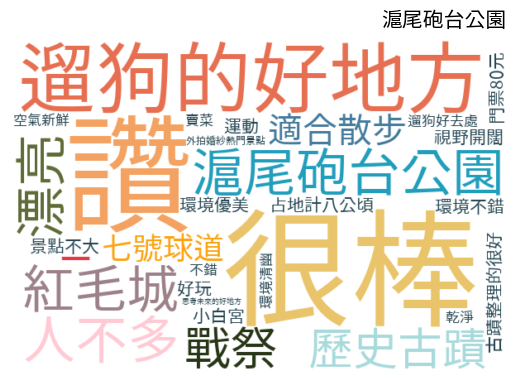

In [11]:
colors = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51", "#219EBC", "#9D8189", "#FFCAD4", "#E63946", "#606C38", "#283618", "#A8DADC", "#457B9D", "#FCA311"]    
used_colors = set()
# 自定義顏色函數，將六位色號轉換為RGB形式
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # 確保每個顏色都至少使用一次
    color = colors[len(used_colors) % len(colors)]
    used_colors.add(color)
    return color

wordcloud = WordCloud(font_path="TaipeiSansTCBeta-Regular.ttf", width=600, height=400, max_words=30, collocations=False, background_color='white',color_func=custom_color_func).generate(text_data)
# wordcloud_2 = WordCloud(font_path="TaipeiSansTCBeta-Regular.ttf", width=800, height=400, max_words=15, collocations=True, background_color='white',color_func=custom_color_func).generate(text_data)

LRT = ["沙崙海水浴場", "情人橋", "觀景平台", "櫻花道", "滬尾礮臺", "美麗新影城", "馬術園區", "家樂福淡新店", "淡江大學","淡水漁人碼頭長堤","滬尾砲台公園"]
#MRT = ["金色水岸", "老街廣場", "淡水碼頭", "海關碼頭", "紅毛城", "小白宮","淡水捷運公園","淡水福佑宮","馬偕上岸處"]
file_name = LRT[10]
#file_name = MRT[8]

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(file_name, fontsize=15, loc="right", pad=10)

file_name = f"{file_name}.jpg"
save_path = f"/Users/chriskeng/Documents/112課程/資科導/期末專案/文字雲/{file_name}"
# 保存為 JPG 格式
plt.savefig(save_path, format="jpg")
print(f"WordCloud saved at: {save_path}")
plt.show()